In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import seaborn as sns
import time

In [2]:
def plot_distribution_save(z, sigma, alpha=0.9, title=None):
    plot = sns.jointplot(x=z[:, 0], y=z[:, 1],
                         joint_kws={"color":"g", "alpha":.9},
                         kind='scatter',
                         marginal_kws={"color":"g", "kde":True, "fill":False},
                         label=f"$\sigma_1=${sigma[0]:.2f}\n$\sigma_2=${sigma[0]:.2f}")
    sns.move_legend(plot.ax_joint, "upper right")
    plt.axis([-4.5, 4.5, -4.5, 4.5])
    plot.fig.set_size_inches((6, 6))
    plt.grid()
    plt.xlabel("")
    plt.ylabel("")
    if title:
        plt.savefig(f"{title}.png")

    plt.show()

In [3]:
!mkdir pics

1.0


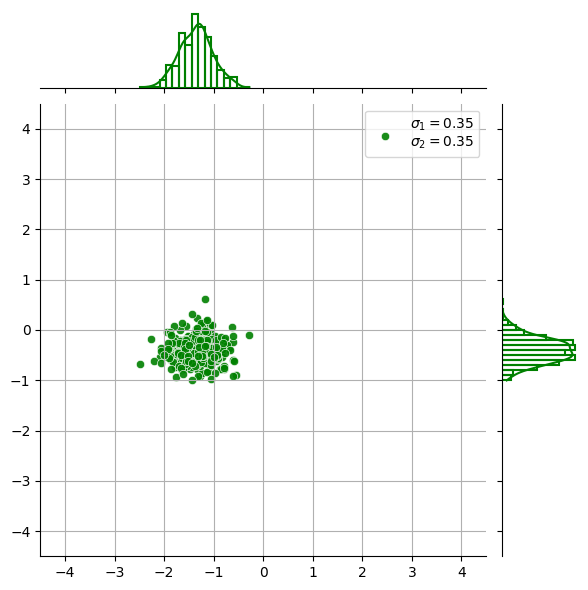

1.0985411419875584


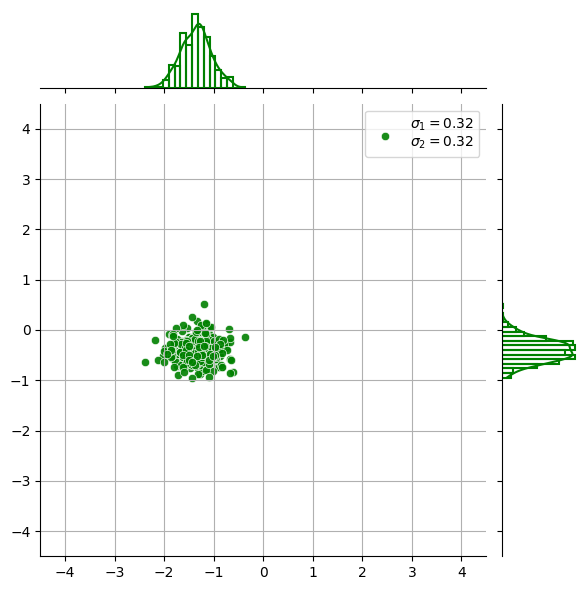

1.2067926406393286


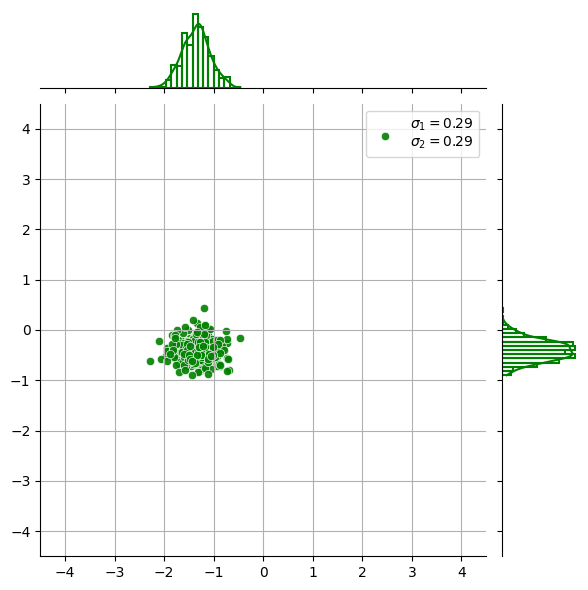

1.3257113655901092


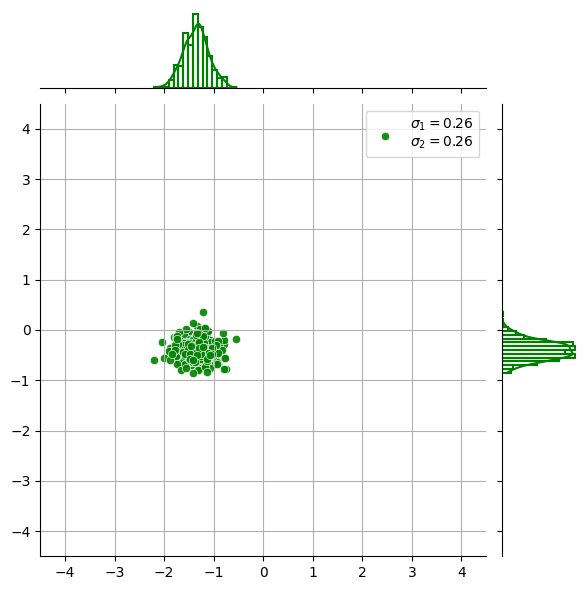

1.4563484775012439


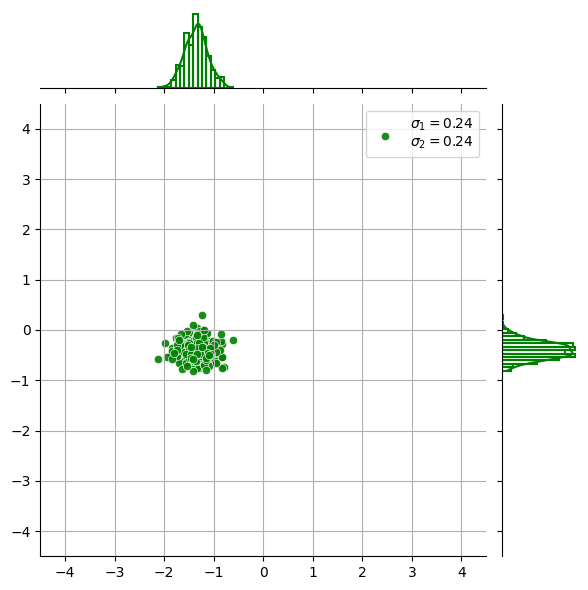

1.5998587196060583


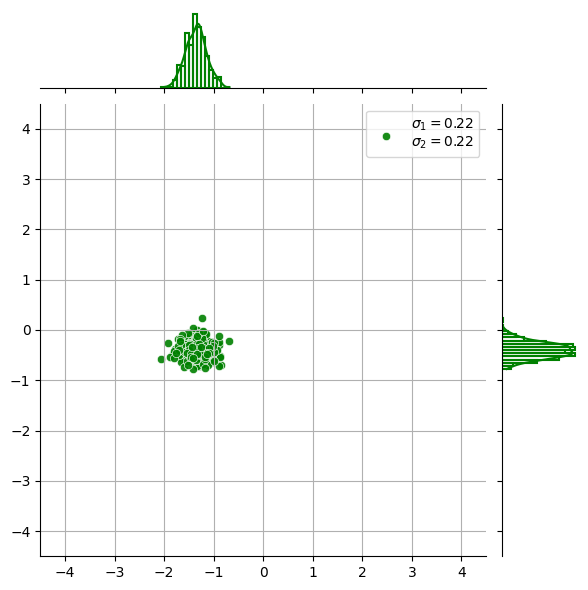

1.757510624854792


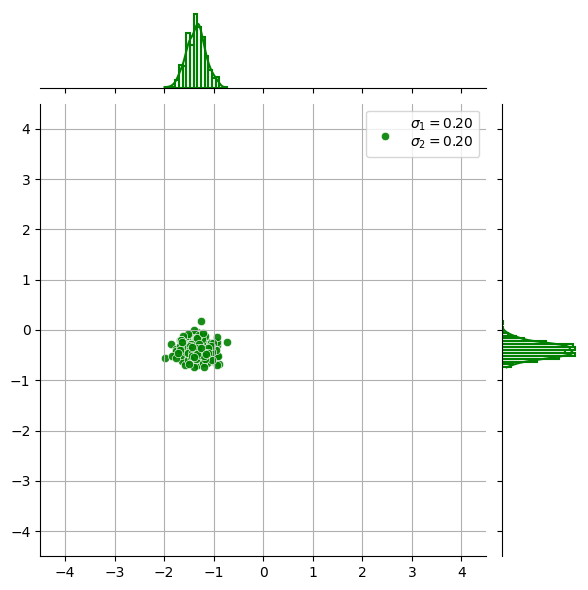

1.93069772888325


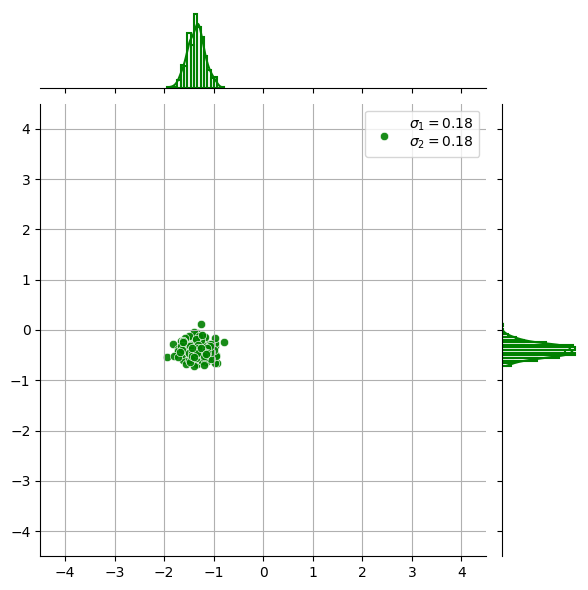

2.120950887920191


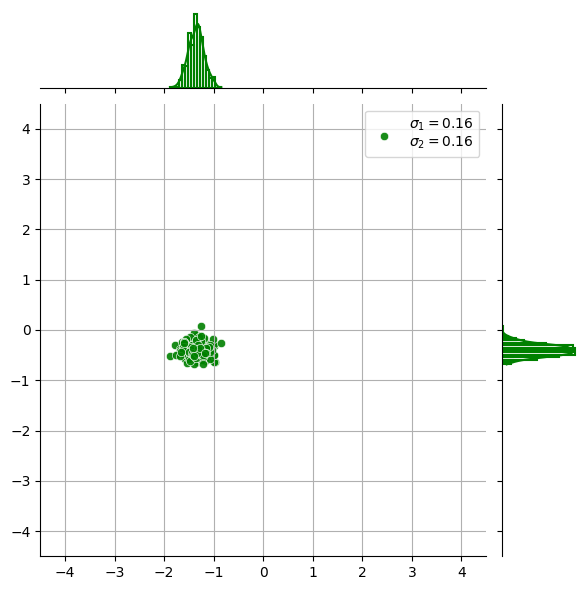

2.3299518105153725


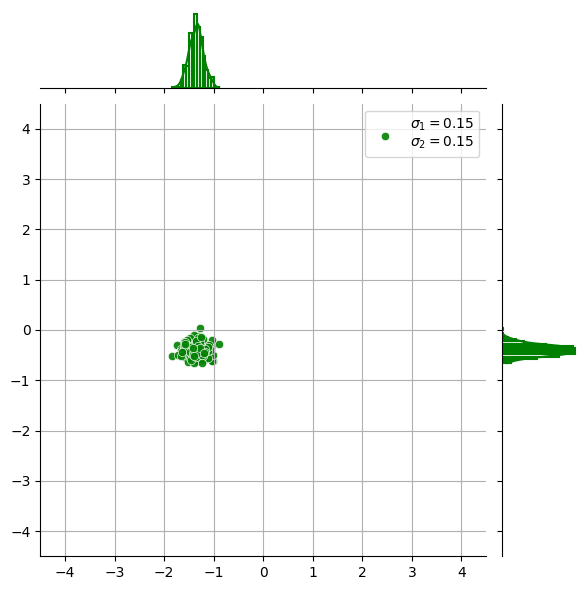

2.559547922699536


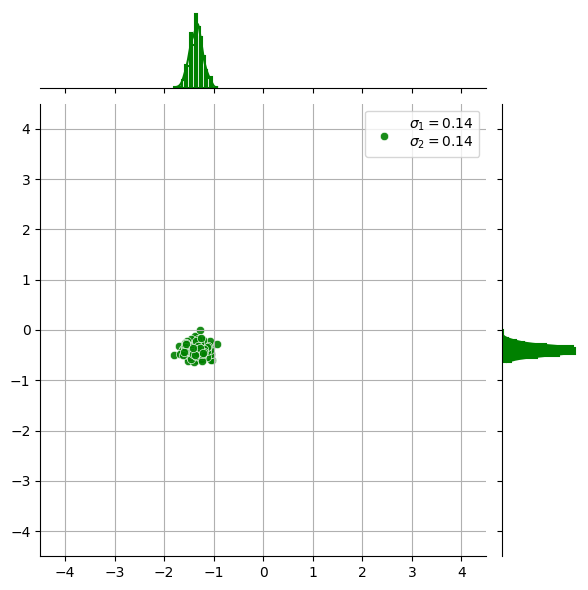

2.8117686979742307


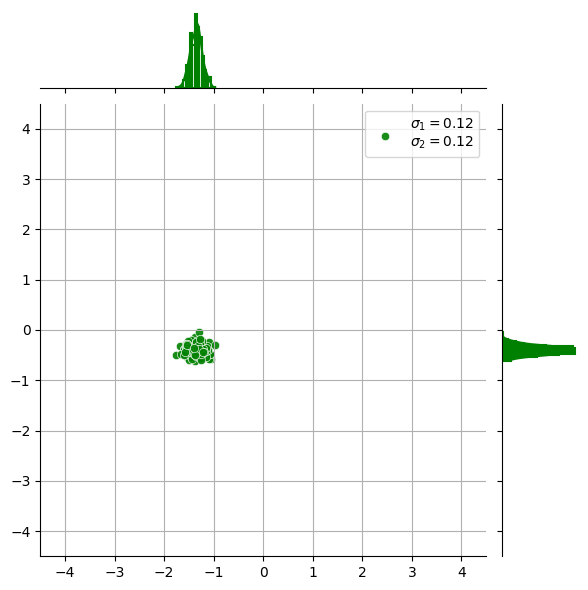

3.0888435964774814


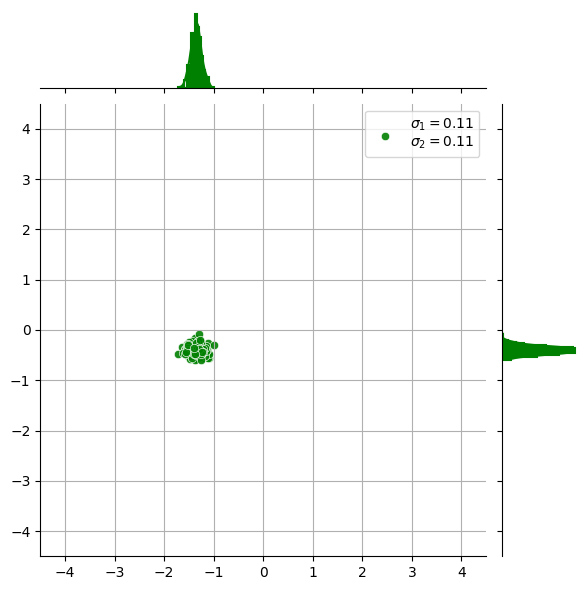

3.393221771895329


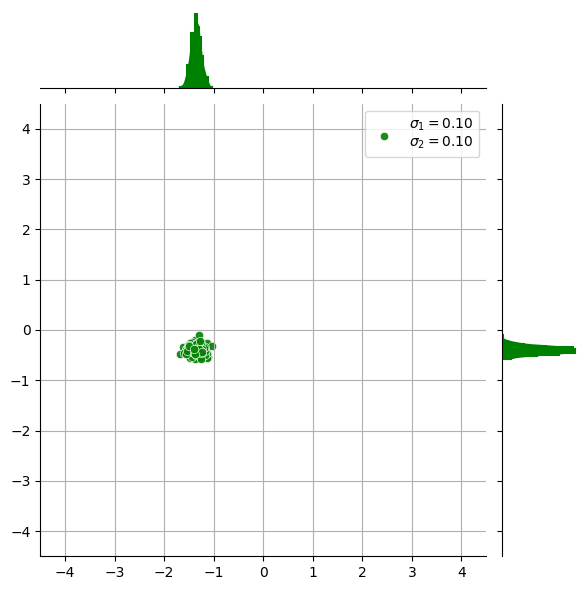

3.7275937203149403


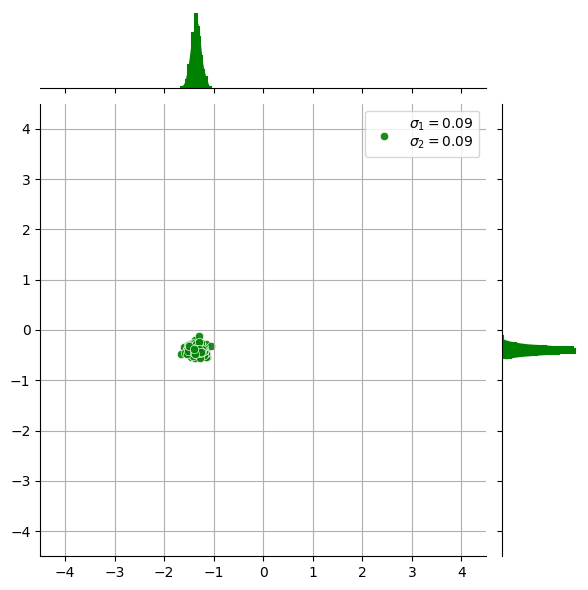

4.094915062380426


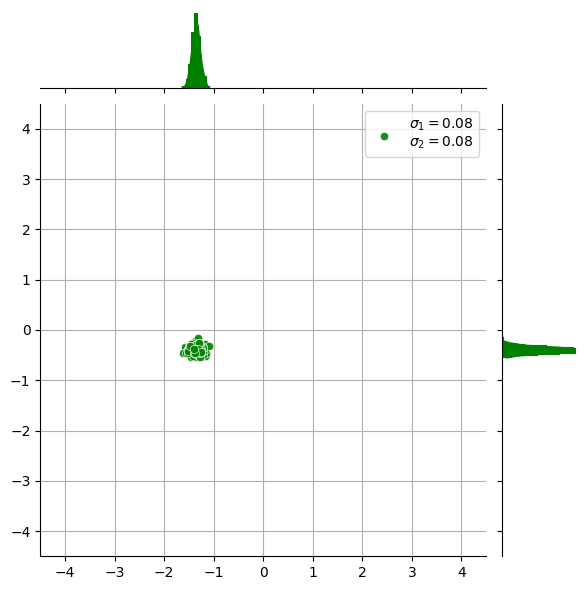

4.498432668969446


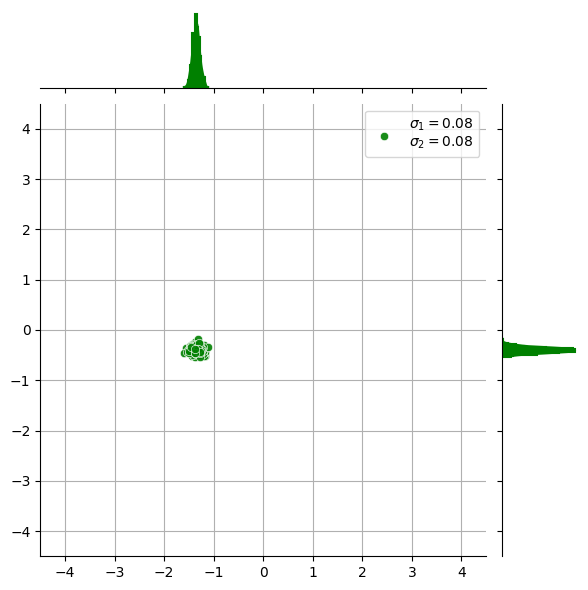

4.941713361323836


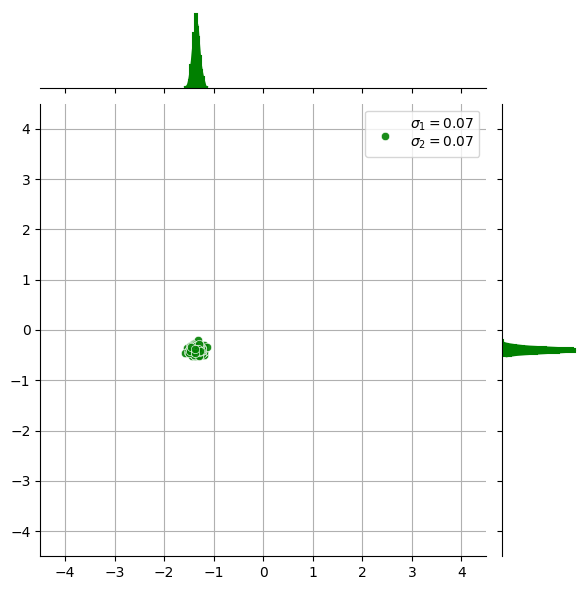

5.428675439323862


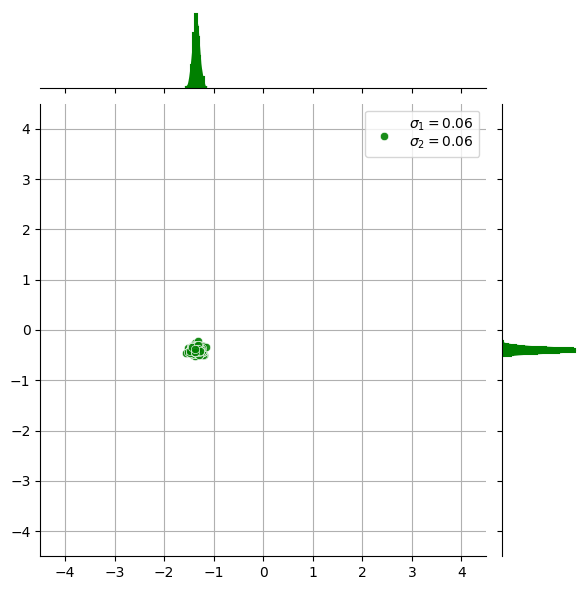

5.963623316594643


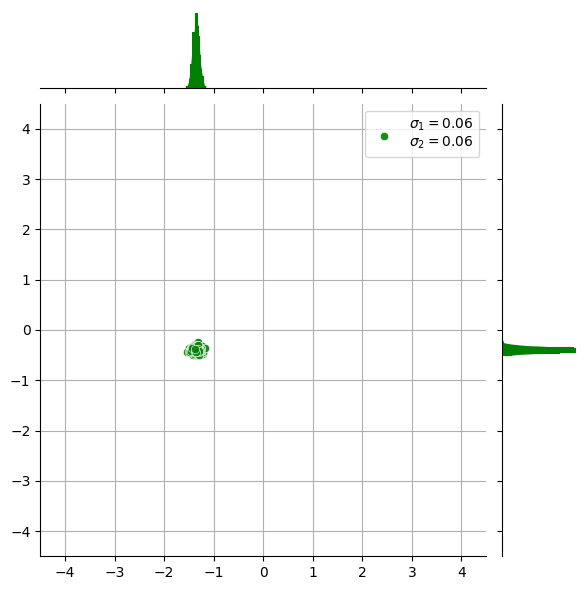

6.551285568595509


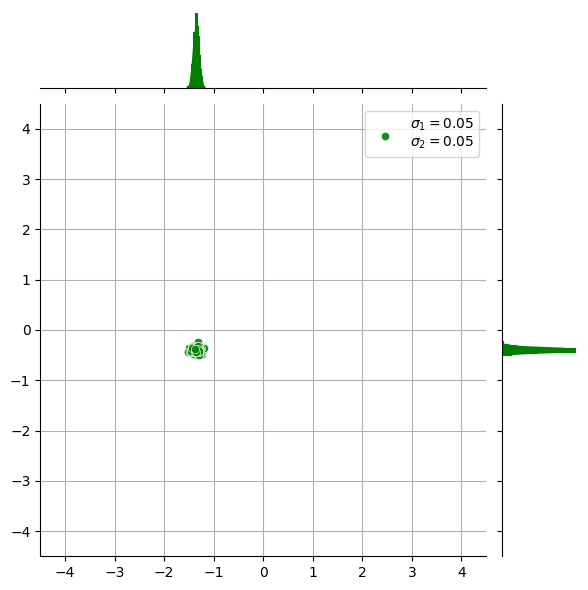

7.196856730011521


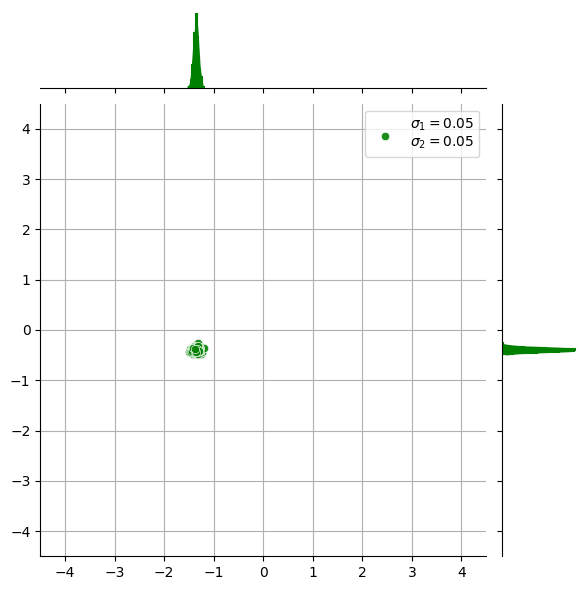

7.9060432109077015


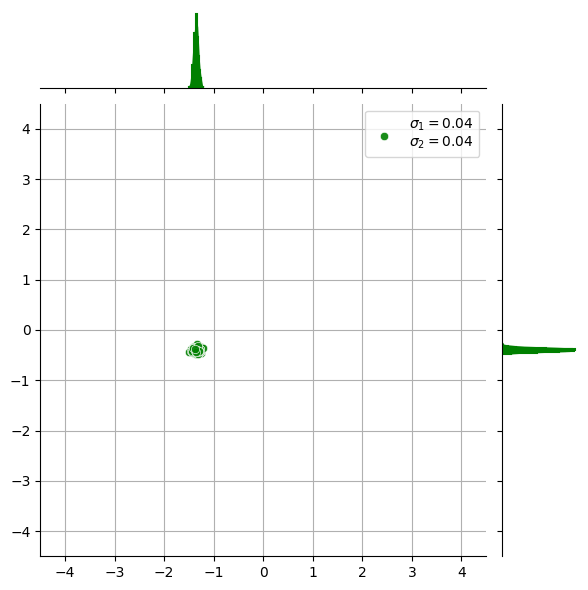

8.685113737513527


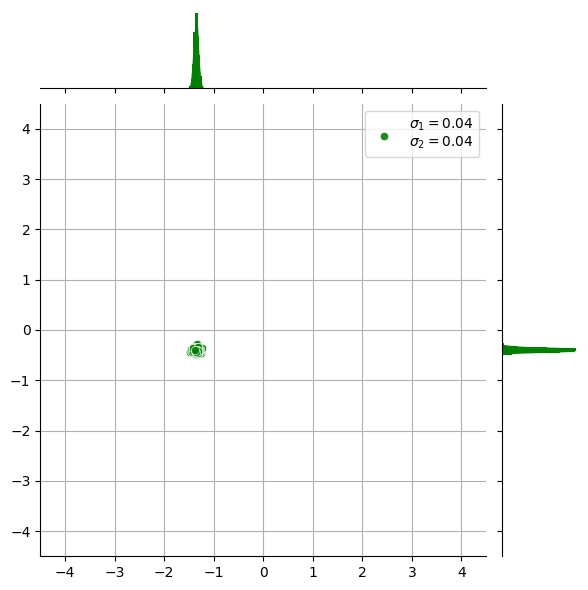

9.540954763499942


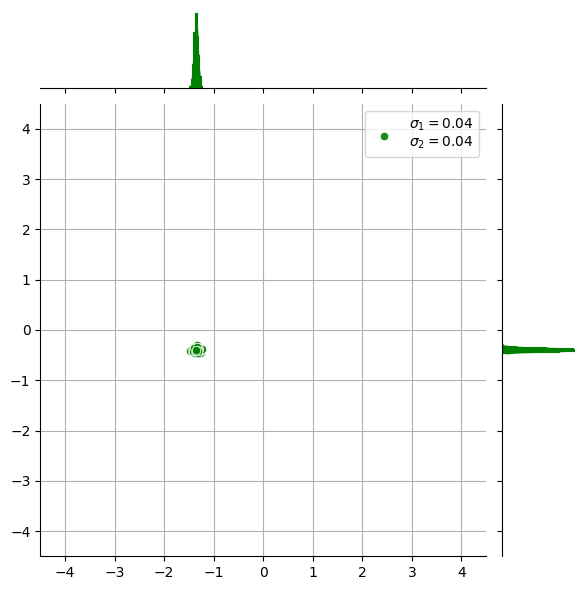

10.481131341546858


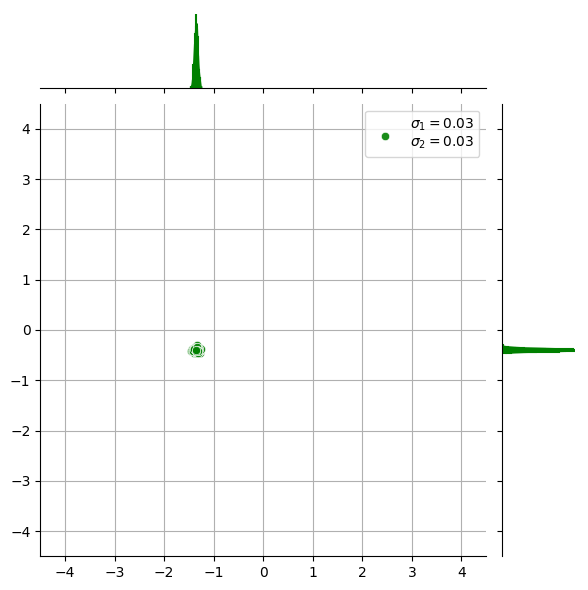

11.513953993264478


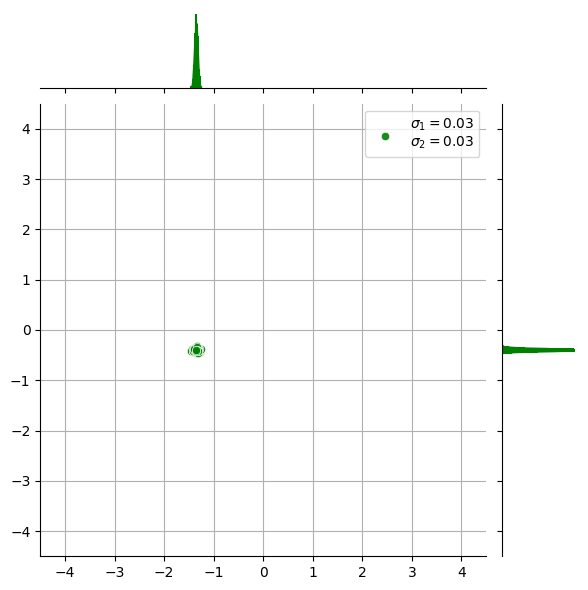

12.648552168552964


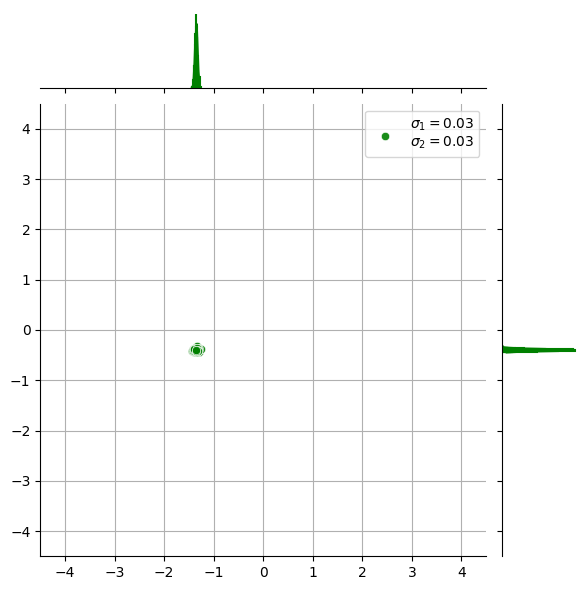

13.894954943731378


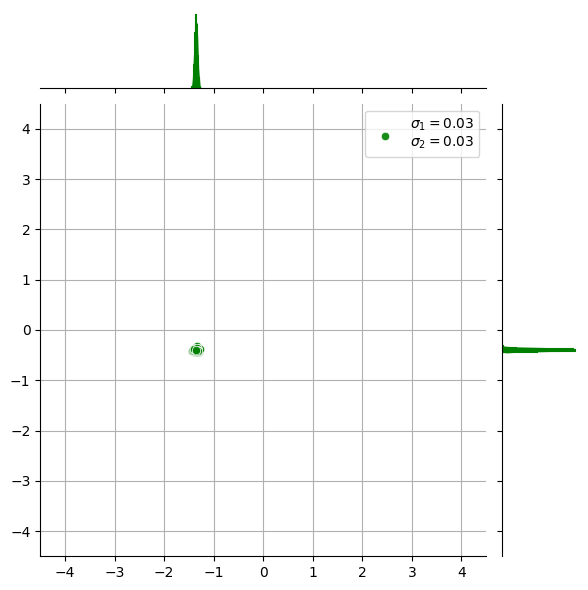

15.26417967175234


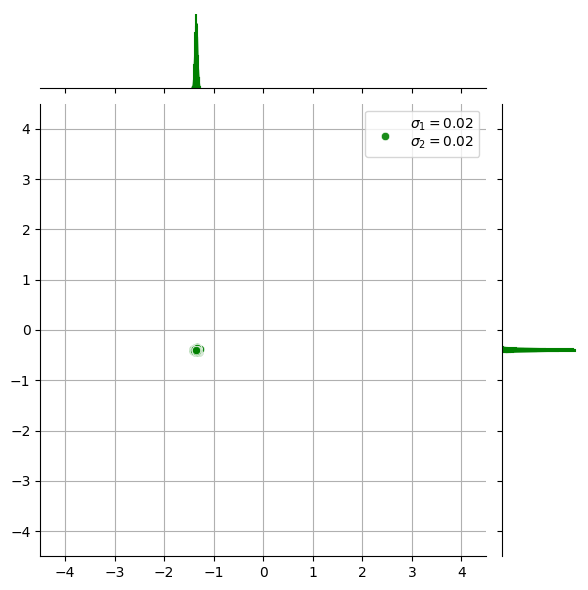

16.768329368110084


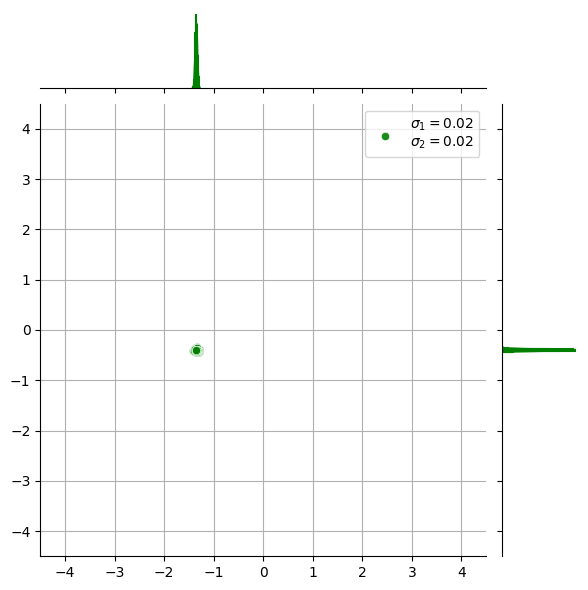

18.420699693267167


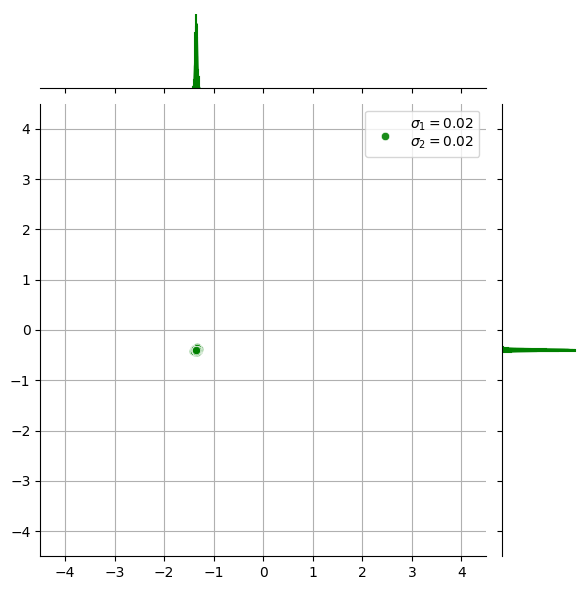

20.235896477251575


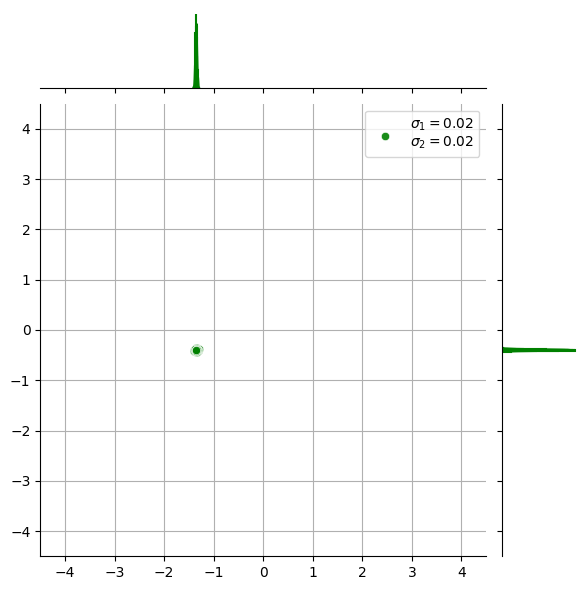

22.22996482526195


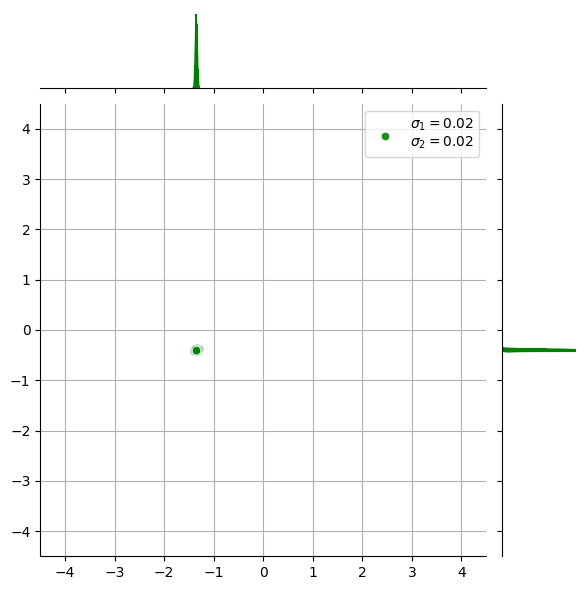

24.42053094548652


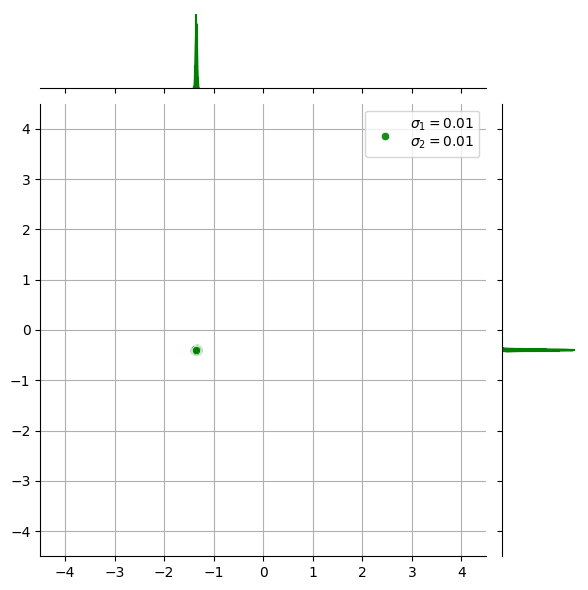

26.82695795279726


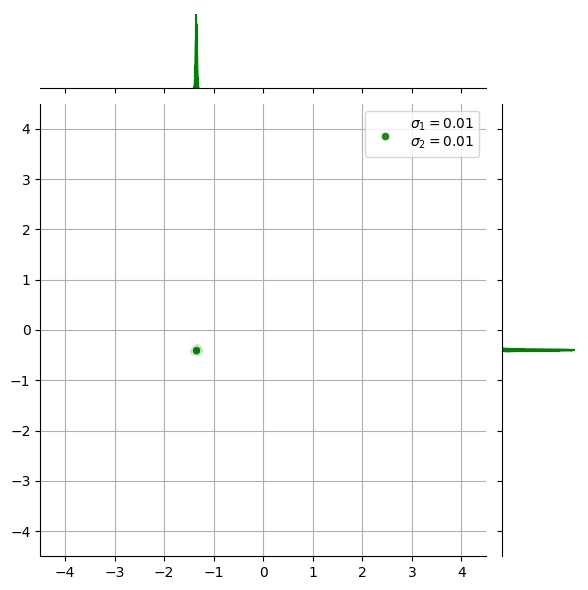

29.47051702551812


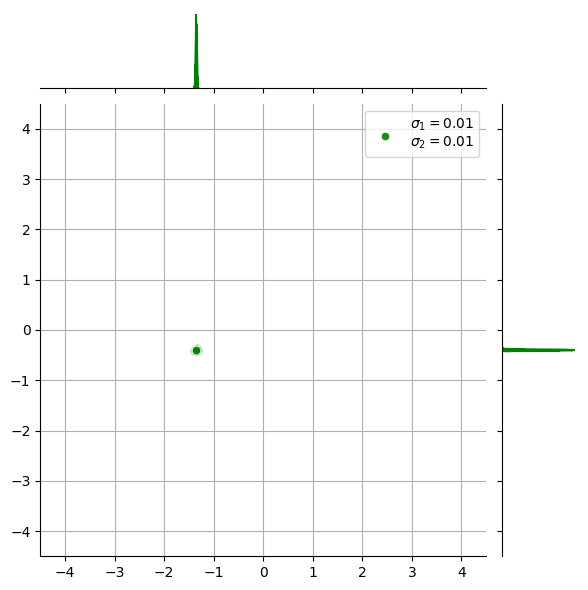

32.37457542817645


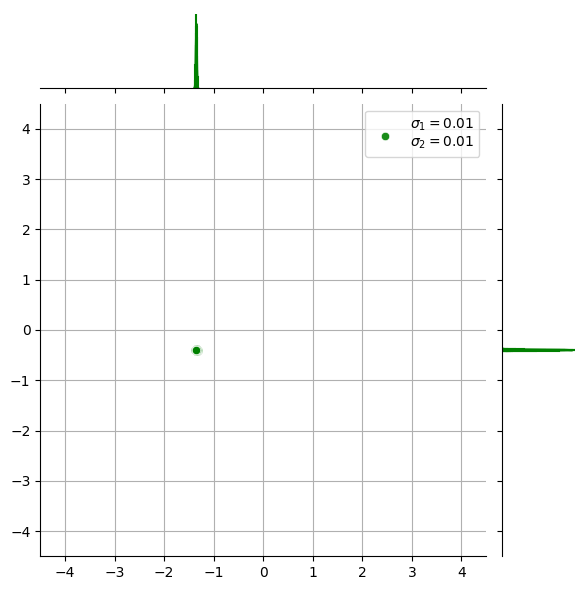

35.56480306223129


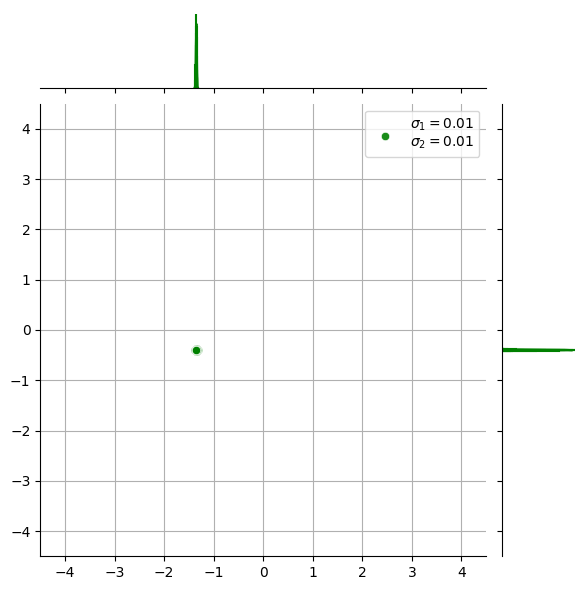

39.069399370546186


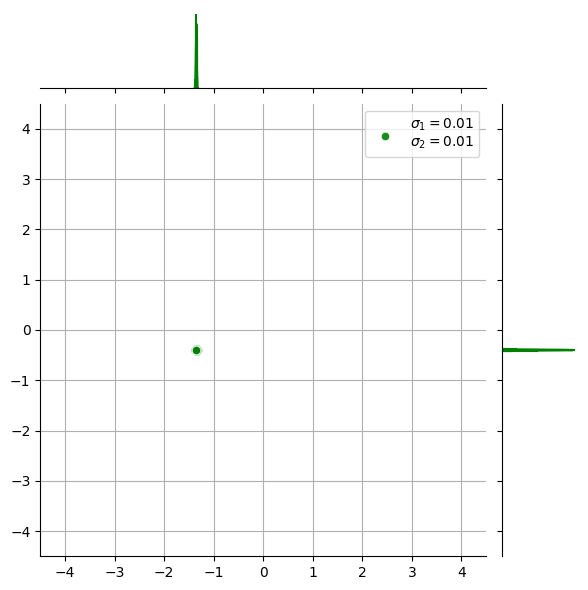

42.91934260128779


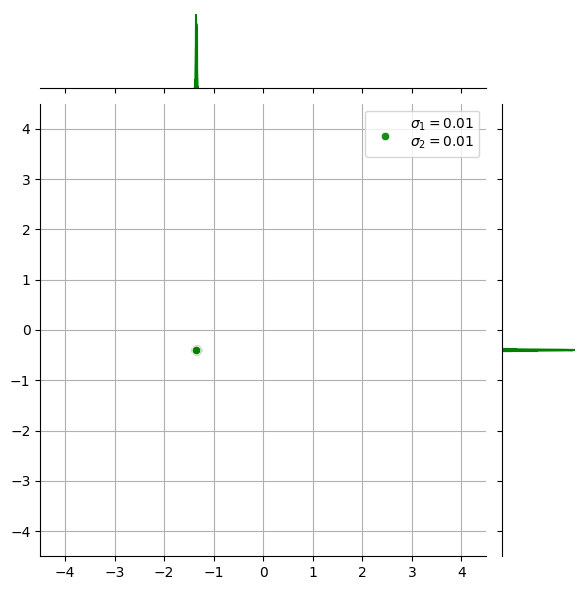

47.14866363457396


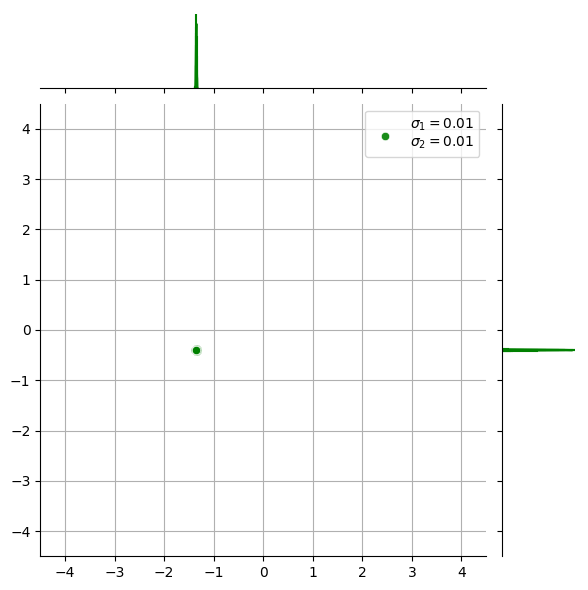

51.794746792312125


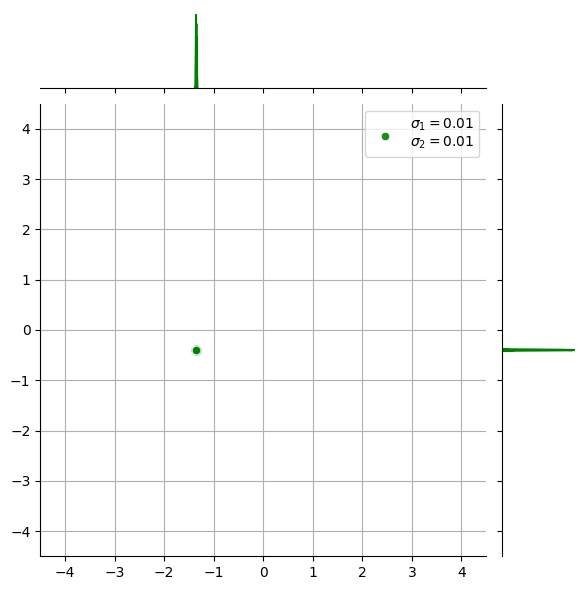

56.898660290183


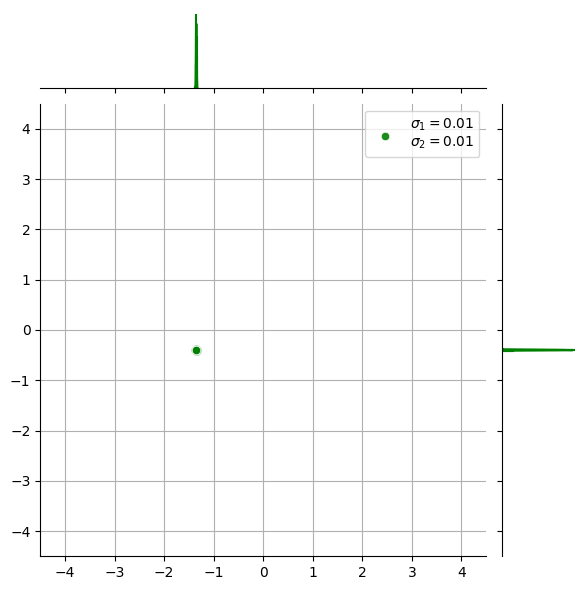

62.50551925273975


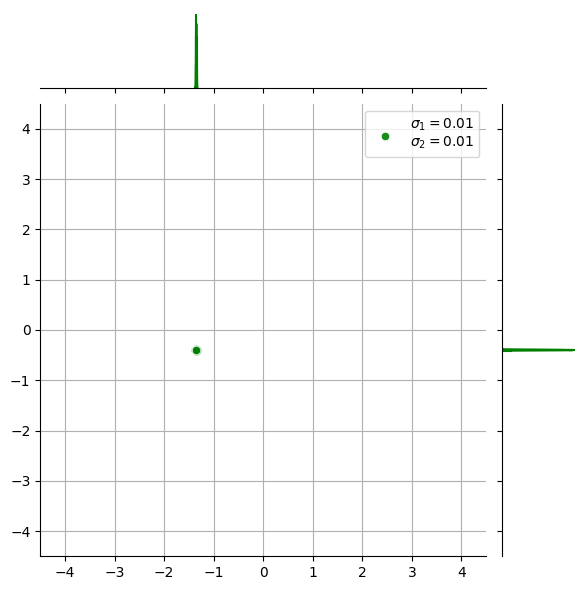

68.66488450043003


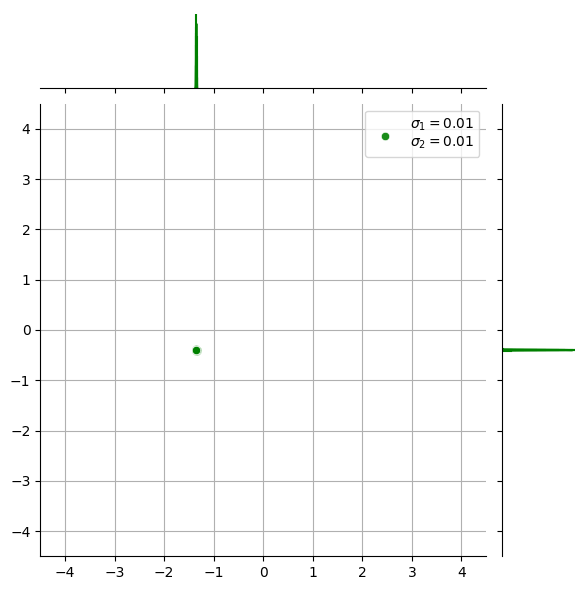

75.43120063354618


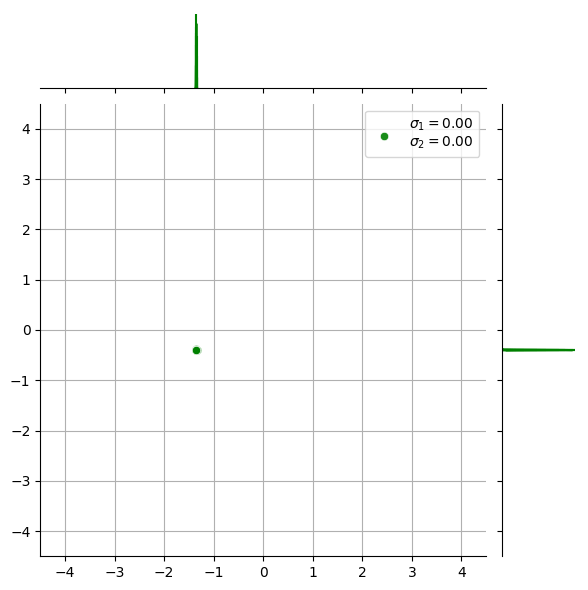

82.8642772854685


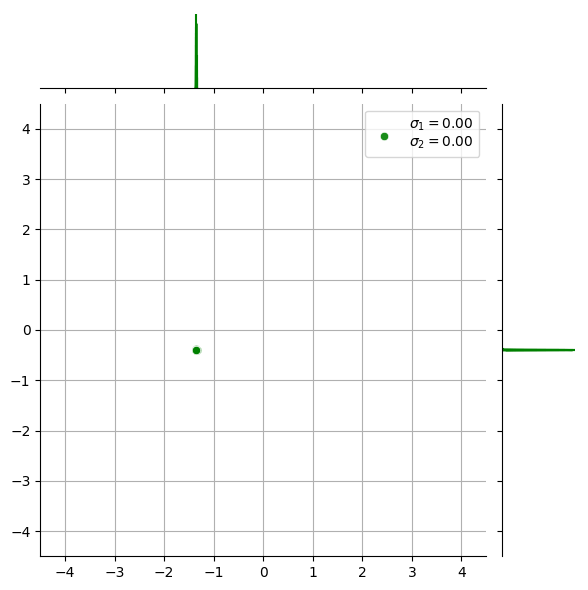

91.02981779915224


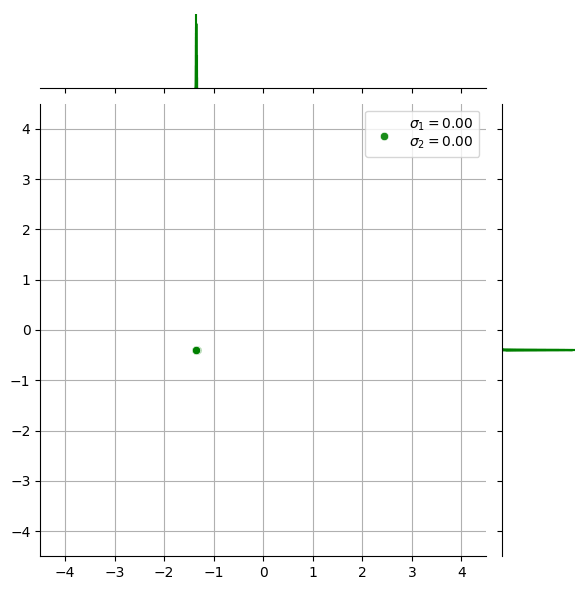

100.00000000000004


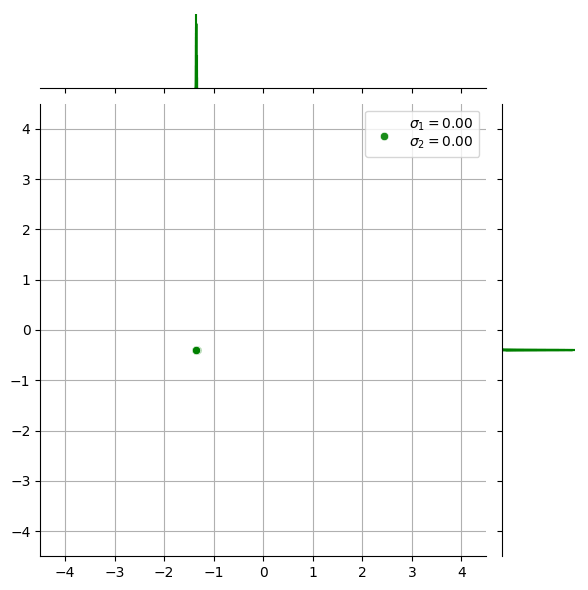

In [4]:
np.random.seed(42)
mu = np.array([-1.35 , -0.4])
sigma = np.array([0.3477699 , 0.26203808])
eps = np.random.randn(300, 2)
denominators = np.exp(np.linspace(np.log(1), np.log(100), 50))
for n in denominators:
    print(n)
    sigma_d = sigma / n
    z = eps * sigma_d + mu
    plot_distribution_save(z, sigma_d, title=f"pics/{time.time()}_distr")

In [5]:
import os
import imageio.v2 as imageio
import glob

files = sorted(glob.glob("pics/*_distr.png"))
print(files)
images = []
for file_name in files:
    images.append(imageio.imread(file_name))

imageio.mimsave("./sigma_decreasing_progress.gif", images, loop=0, fps=24)

['pics/1717150372.1730316_distr.png', 'pics/1717150375.4293373_distr.png', 'pics/1717150378.95939_distr.png', 'pics/1717150381.9327736_distr.png', 'pics/1717150386.932319_distr.png', 'pics/1717150391.6328375_distr.png', 'pics/1717150394.437855_distr.png', 'pics/1717150397.0941982_distr.png', 'pics/1717150399.6561837_distr.png', 'pics/1717150401.1896772_distr.png', 'pics/1717150402.8658578_distr.png', 'pics/1717150403.8802872_distr.png', 'pics/1717150404.9245512_distr.png', 'pics/1717150405.9574585_distr.png', 'pics/1717150406.9985135_distr.png', 'pics/1717150408.504653_distr.png', 'pics/1717150410.290627_distr.png', 'pics/1717150411.3133864_distr.png', 'pics/1717150412.295379_distr.png', 'pics/1717150413.6242902_distr.png', 'pics/1717150415.096483_distr.png', 'pics/1717150416.4301095_distr.png', 'pics/1717150417.430157_distr.png', 'pics/1717150418.4358947_distr.png', 'pics/1717150419.7464294_distr.png', 'pics/1717150420.7330952_distr.png', 'pics/1717150421.757895_distr.png', 'pics/1717

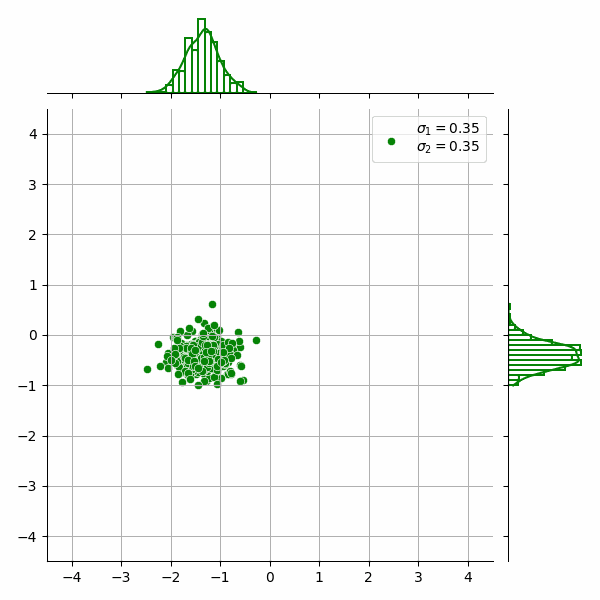

In [6]:
from IPython.display import Image as iImage
iImage(open("./sigma_decreasing_progress.gif", "rb").read())

In [7]:
!zip -q sigma_decreasing_progress.zip pics/*.png